## Analysis of professor ratings

(array([ 1.,  1.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  3.,  0.,  2.,  5.,
         0.,  6.,  0.,  4.,  0., 11.,  0., 11.,  0., 17.,  0., 20., 19.,
         0., 19.,  0., 26.,  0., 24.,  0., 28.,  0., 22.,  0., 26., 43.,
         0., 41.,  0., 34.,  0., 25.,  0., 35.,  0., 25., 11.]),
 array([2.3  , 2.354, 2.408, 2.462, 2.516, 2.57 , 2.624, 2.678, 2.732,
        2.786, 2.84 , 2.894, 2.948, 3.002, 3.056, 3.11 , 3.164, 3.218,
        3.272, 3.326, 3.38 , 3.434, 3.488, 3.542, 3.596, 3.65 , 3.704,
        3.758, 3.812, 3.866, 3.92 , 3.974, 4.028, 4.082, 4.136, 4.19 ,
        4.244, 4.298, 4.352, 4.406, 4.46 , 4.514, 4.568, 4.622, 4.676,
        4.73 , 4.784, 4.838, 4.892, 4.946, 5.   ]),
 <BarContainer object of 50 artists>)

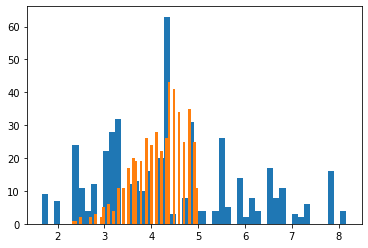

In [2]:
import sys
import pandas as pd
import statsmodels.api as sm
from pyprojroot import here

import matplotlib.pyplot as plt

df = pd.read_csv(here("pandas/data/evals-mod.csv"))

# get row wise average
df['bty_avg'] = df.loc[:, 'bty_f1lower':'bty_m2upper'].mean(axis=1)

plt.hist(df['bty_avg'], bins=50)
plt.hist(df['score'], bins=50)
# plot = plt.scatter(x=df['score'] , y= df['bty_avg'])
# print(plot)

# jupyter notebook

In [10]:
X = df['bty_avg']
X = sm.add_constant(X) 
y = df['score']


In [15]:
model = sm.OLS(y, X)
results = model.fit()

In [16]:
print(results.summary())
results.params

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           5.08e-05
Time:                        08:23:59   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8803      0.076     50.961      0.0

const      3.880333
bty_avg    0.066637
dtype: float64